Script 2-1: creating an igraph network from spatial data files

In [1]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os

In [11]:
file = "BF_Millet.csv"
mydata=pd.read_csv(file,encoding='latin1')
mydata.head()

,Year,BALÃ,BAM,BANWA,BAZÃGA,BOUGOURIBA,BOULGOU,BOULKIEMDÃ,COMOÃ,GANZOURGOU,...,SISSILI,SOUM,SOUROU,TAPOA,TUY,YAGHA,YATENGA,ZIRO,ZONDOMA,ZOUNDWÃOGO
0,2015Q2,163.166667,8252.833333,153.666667,195.000000,194.666667,5619.444444,191.666667,218.000000,179.333333,...,190.000000,197.833333,180.000000,192.666667,142.000000,7655.444444,202.636667,164.333333,192.666667,188.333333
1,2015Q3,165.166667,8851.000000,151.000000,216.000000,208.000000,5900.444444,200.000000,211.000000,173.666667,...,198.000000,207.166667,185.333333,191.666667,160.000000,8496.222222,204.666667,165.000000,190.666667,201.666667
2,2015Q4,153.666667,8596.000000,137.666667,208.666667,174.666667,5564.777778,196.333333,210.333333,166.666667,...,216.000000,183.666667,170.000000,184.800000,144.333333,7085.333333,200.333333,164.000000,173.000000,192.666667
3,2016Q1,154.666667,8095.000000,130.666667,208.333333,180.666667,5506.555556,184.333333,194.333333,167.333333,...,212.333333,187.166667,169.000000,150.600000,134.666667,7364.777778,197.333333,139.333333,182.666667,193.000000
4,2016Q2,157.333333,8267.000000,151.000000,227.666667,213.333333,5855.222222,183.000000,210.666667,178.666667,...,214.666667,204.833333,183.000000,154.000000,139.000000,7656.777778,194.666667,151.666667,198.000000,208.666667


In [14]:
#import weight matrix of Burkina Faso markets
file="weights_bk.csv"
weights=pd.read_csv(file,encoding='latin1')
weights.head()

,Year,BALÃ,BAM,BANWA,BAZÃGA,BOUGOURIBA,BOULGOU,BOULKIEMDÃ,COMOÃ,GANZOURGOU,...,SISSILI,SOUM,SOUROU,TAPOA,TUY,YAGHA,YATENGA,ZIRO,ZONDOMA,ZOUNDWÃOGO
0,BALÃ,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,BAM,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BANWA,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,BAZÃGA,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,BOUGOURIBA,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#define the metric between markets and construct the local Moran statistic
#here, correlation coefficient
data=mydata.iloc[:,1:46]
weights_total=weights.iloc[:,1:46]
cor=np.corrcoef(data.transpose())
cor[cor>0]=1
cor_weighted=np.multiply(cor,weights_total)
cor_weighted

,BALÃ,BAM,BANWA,BAZÃGA,BOUGOURIBA,BOULGOU,BOULKIEMDÃ,COMOÃ,GANZOURGOU,GNAGNA,...,SISSILI,SOUM,SOUROU,TAPOA,TUY,YAGHA,YATENGA,ZIRO,ZONDOMA,ZOUNDWÃOGO
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#creat market graph and get rid of loops created from the correlation
bf_market_w=Graph.Adjacency(cor_weighted,mode="undirected")
edge_list=bf_market_w.get_edgelist()
self_loop=[]
for i in range(0,46):
    self=(i,i)
    self_loop.append(self)
to_remove=[]
for i in edge_list:
    for j in self_loop:
        if i==j:
            to_remove.append(i)
bf_market_w.delete_edges(to_remove)

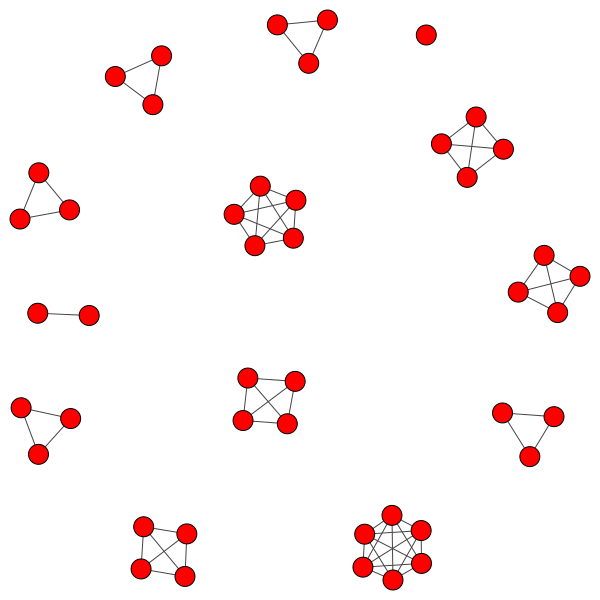

In [18]:
#create plot
ig.plot(bf_market_w)

Modification to Script 2-1

In [19]:
#define the metric between markets and construct the local Moran statistic with thresholding
#here, correlation coefficient
data=mydata.iloc[:,1:46]
weights_total=weights.iloc[:,1:46]
cor=np.corrcoef(data.transpose())
cor[cor>=0.9]=1
cor[cor<0.9]=0
cor_weighted=np.multiply(cor,weights_total)

In [20]:
#creat market graph and get rid of loops created from the correlation
bf_market_w=Graph.Adjacency(cor_weighted,mode="undirected")
edge_list=bf_market_w.get_edgelist()
self_loop=[]
for i in range(0,46):
    self=(i,i)
    self_loop.append(self)
to_remove=[]
for i in edge_list:
    for j in self_loop:
        if i==j:
            to_remove.append(i)
bf_market_w.delete_edges(to_remove)

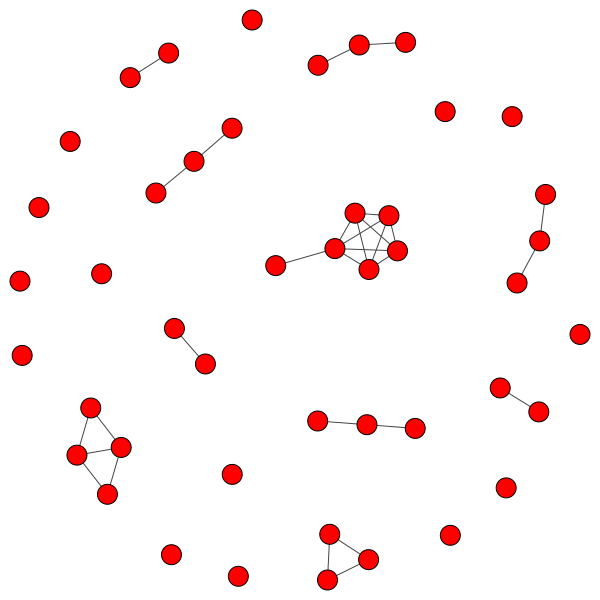

In [21]:
#create plot
ig.plot(bf_market_w)

Script 2-2: creating a social network in NetworkX

In [22]:
#import needed packages
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import math

In [23]:
#reading the dataset
fichier = pd.read_csv("AIMS_data.csv")
data = pd.DataFrame(fichier)
data

,Name,Country,Age,Field,Background,Friend 1,Friend 2,Friend 3,Friend 4,Friend 5
0,Alice,Kenya,24.0,Data Science,Applied Mathematics,Dorcas,Caleb,Brenda,Christabel,Victor
1,Aloys,Cameroon,26.0,Data Science,Civil Engineering,Ibrahim,Hamed,Mikael,Roland,Leon
2,Aneva,Cameroon,21.0,Fundamental Science,Applied mathematics,Meskerem,Richard,Kevine,Enock,Victor
3,Ange,Cameroon,24.0,Data Science,Network & Telecom,Hadja,Rodrigue,Roland,Thierry,Kevine
4,Ariane,Cameroon,27.0,Fundamental Science,Mathematics,Nathalie,Guerda,Patrick,Stebine,Rostand
5,Blessing,Nigeria,25.0,Data Science,Mathematics,Emmanuel,Victor,Peace,Patrick,Patience
6,Brenda,Cameroon,20.0,Data Science,Applied Mathematics,Dorcas,Alice,Christabel,Caleb,Delchere
7,Caleb,Kenya,24.0,Fundamental Science,Mathematics,Meskerem,Alice,Dorcas,Christabel,Brenda
8,Carelle,Cameroon,24.0,Climate Science,physics,Stebine,Christabel,Delchere,Phanie,Rostand
9,Caroline,Ghana,23.0,Climate Science,Mathematics,Mavis,Richard,Peniel,Emmanuel,Elnathan


In [24]:
#intializing the social network
aimsNetwork = nx.Graph()

#populating the network with nodes and edges
for i in range(len(data["Name"])) : 
    aimsNetwork.add_node(data["Name"][i], Age=data["Age"][i],country=data["Country"][i],   
    Field=data["Field"][i], background=data["Background"][i])
    for j in range(len(data["Name"])) :
        aimsNetwork.add_edge(data["Name"][j],data["Friend 1"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 2"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 3"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 4"][j])
        aimsNetwork.add_edge(data["Name"][j],data["Friend 5"][j])

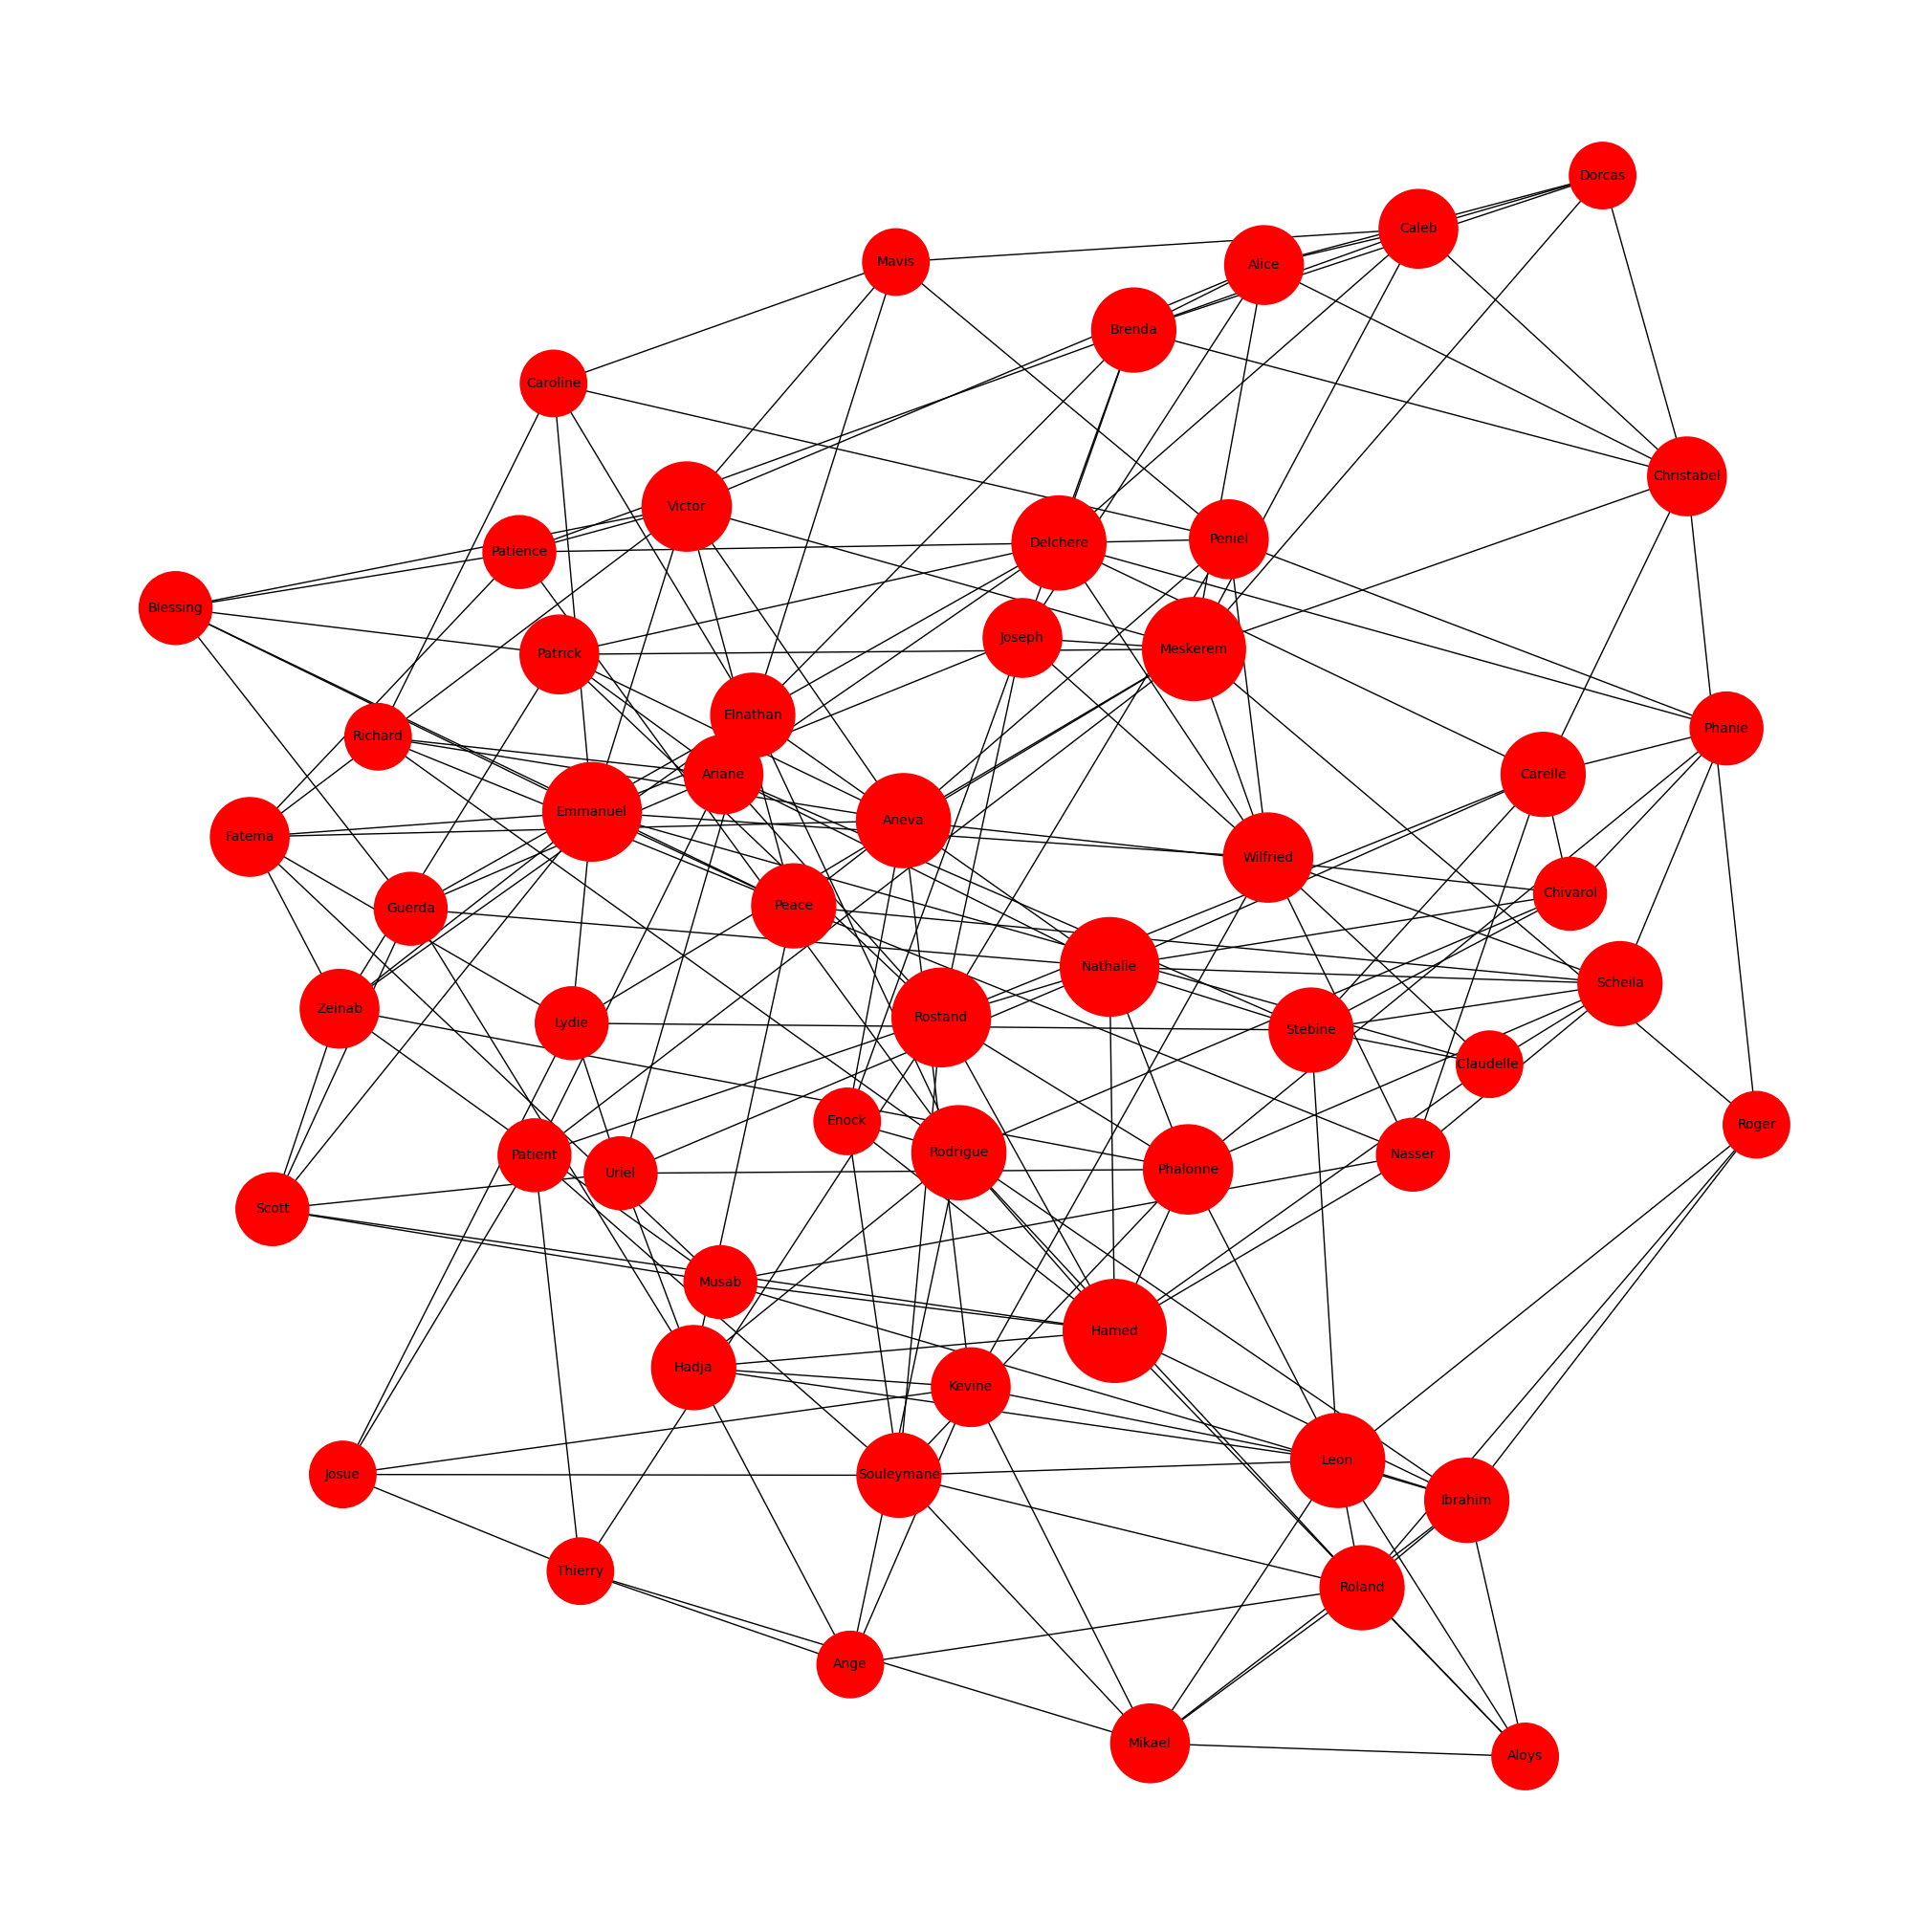

In [25]:
#plot AIMS student social network 
Degree=aimsNetwork.degree() 
var = [500*k[1] for k in list(Degree)]
plt.figure(figsize=(20,20))
nx.draw_spring(aimsNetwork, font_size=10, node_size = var, with_labels=True, node_color="red")
plt.show()